### Library import

In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import random

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(style="whitegrid")

### 통계 및 확률

In [6]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])

In [7]:
print("mean: ", np.mean(x))
print("median: ", np.median(x))
print("min: ", x.min())
print("max: ", x.max())
print("var: ", x.var())
print("std: ", x.std())
print("var: ", x.var(ddof=1))
print("std: ", x.std(ddof=1)) #ddof는 델타 자유도

mean:  3.1
median:  3.0
min:  0.9
max:  6.7
var:  3.0700000000000007
std:  1.7521415467935233
var:  3.5085714285714293
std:  1.8731181032095732


### 랜덤 수

In [9]:
np.random.rand()

0.9257770533952427

In [10]:
np.random.randn()

-0.5635978835372517

In [11]:
np.random.rand(5)

array([0.9608972 , 0.37320768, 0.12076102, 0.17553421, 0.63478626])

In [17]:
np.random.randn(2, 4) #배열 모양 결정

array([[ 2.0326442 , -0.49664873,  1.83643823,  0.56363968],
       [ 0.31585865,  0.96265901, -0.0956783 , -0.43577497]])

In [18]:
np.random.randint(10, size=10) #상한선, 크기

array([5, 4, 1, 0, 3, 0, 4, 1, 7, 3])

In [19]:
np.random.randint(low=10, high=20, size=(2, 10)) #하한, 상한, 크기

array([[12, 18, 19, 17, 13, 14, 19, 14, 10, 16],
       [12, 17, 16, 18, 12, 13, 17, 10, 12, 12]])

Text(0.5, 1.0, 'randint(low=1, high=10)')

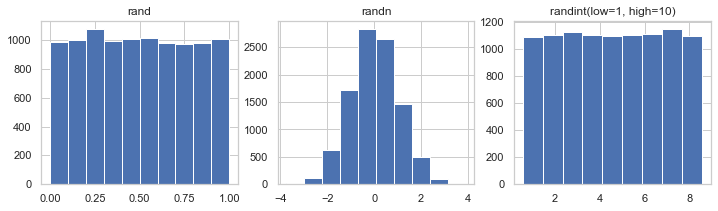

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

In [22]:
# seed는 랜덤 수 발생기를 특정 상태로 초기화하는 숫자  
# 특정 숫자로 시딩하면 항상 동일한 랜덤수 생성

np.random.seed(123456789); np.random.rand()

0.532833024789759

In [30]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [23]:
# random 모듈을 직접 사용하는것보다는 randomState instance를 사용하는 게 코드의 독립성을 높인돠!

prng = np.random.RandomState(123456789)
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

### 확률 변수 및 분포

In [24]:
X = stats.norm(1, 0.5) #평균 1.0 / 표준편차 0.5

In [25]:
print("mean: ", X.mean())
print("median: ", X.median())
print("std: ", X.std())
print("var: ", X.var())

mean:  1.0
median:  1.0
std:  0.5
var:  0.25


In [33]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        # 이산 확률 변수에는 PDF 메서드가 없어서 PMF를 대신 사용
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
    
    return axes

Text(0, 0.5, 'Poisson dist.')

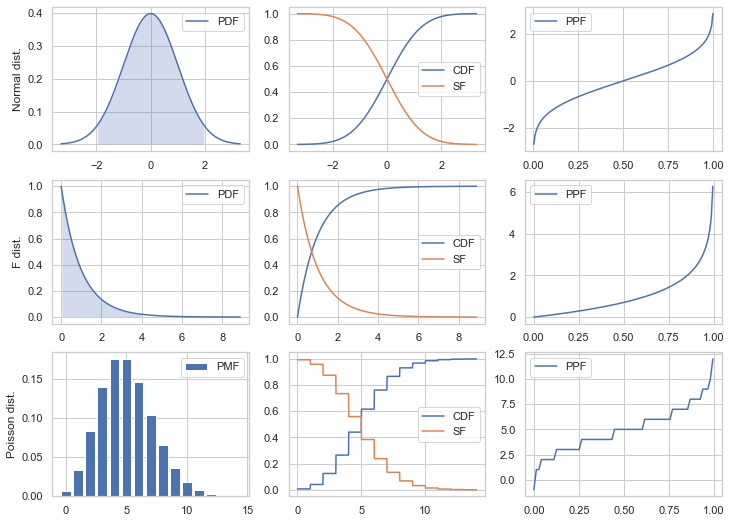

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

#차례대로 정규분포, F분포, 푸아송분포의 
#확률 질량 함수(PDF or PMF), 누적 분포 함수(CDF), 생존 함수(SF), 퍼센트-포인트 함수(PPF)

In [38]:
X = stats.norm(1, 0.5) #평균 1.0 / 표준편차 0.5
X.rvs(10) #rvs(확률 변수 표본) 메서드 사용하여 확률 분포에 따라 분포하는 랜덤 수 추출

array([0.20452301, 1.12984549, 1.2079817 , 0.20913862, 0.09153412,
       0.91753589, 0.89840189, 0.31576122, 1.30928274, 1.38177901])

In [44]:
# 결과 랜덤수가 실제로 해당 확률 분포 함수에 따라 분포하는지 확인
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", density=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

<AxesSubplot:title={'center':'exponential dist.'}>

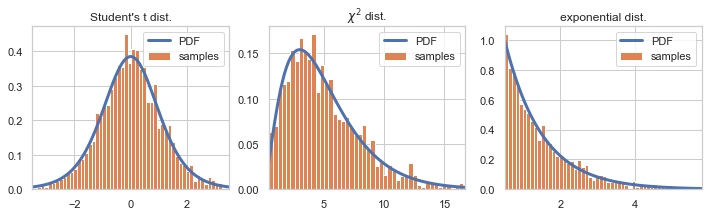

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000

# 스튜던트-t 분포
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])

# 카이-제곱 분포
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])

# 지수 분포
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])

In [48]:
# 자유도가 5인 분포에서 500개의 랜덤 표본 추출, fit을 사용해 확률변수에 재적합화
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(5.171610395774218, 0.06225816841023289, 0.9604087978350506)

In [49]:
# fit은 주어진 데이터로 분포의 최대 우도 매개변수를 반환
# 이 매개변수들은 chi2의 초기화에 전달해 새로운 확률 변수 Y를 생성
# Y의 확률 분포는 원래 확률 변수 X의 확률 분포와 유사해야함
Y = stats.chi2(df=df, loc=loc, scale=scale)

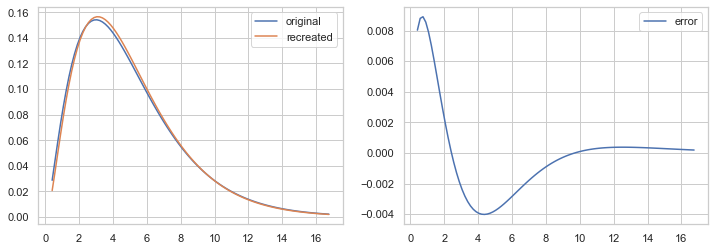

In [52]:
# X와 Y를 검증하기 위해 두 확률 변수에 대한 확률 분포 함수 표시
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

### 가설 검정

In [53]:
np.random.seed(123456789)
mu, sigma = 1.0, 0.5
X = stats.norm(mu-0.2, sigma)

In [54]:
n = 100
X_samples = X.rvs(n)

In [55]:
z = (X_samples.mean() - mu)/(sigma/np.sqrt(n))
z

-2.8338979550098298

|귀무 가설|분포|검정을 위한 Scipy 함수|
|------|---|---|
|모집단의 평균이 주어진 값인지 검정|정규분포(stats.norm) 또는 스튜던트-t 분포(stats. t)|stats.ttest_lsamp|
|두 확률 변수의 평균이 동일한지 검정(독립 또는 쌍으로 된 표본)|스튜던트-t 분포(stats.t)|stats.ttest_ ind, stats.ttest_rel|
|데이터에 대한 연속 분포 적합화 적정성|코모고로프-스미르노프 분포|stats.kstest|
|범주형 데이터가 주어진 빈도로 발생하는지 검정(정규분포하는 변수의 제곱 합)|카이제곱 분포(stats.ch i2)|stats.chisquare|F 분포(stats.f)|
|분할표(contingency table)에서 범주형 변수의 독립성 검정|카이제곱 분포(stats.ch i2)|stats.chi2_contingency|
|둘 이상 변수 표본의 분산이 같은지 검정|F 분포(stats.f)|stats.barlett, stats.levene|
|두 변수의 상관 관계가 없다는 것을 검정|베타 분포(stats.beta, 
stasts.mstats.betai.)|stats.pearsonr, stats.spearmanr |
|둘 이상의 변수가 동일한 모집단 평균을 갖는지 검정(아노바-분산 분석)|F 분포|stats.f_oneway, stats.kruskal|

In [82]:
# 귀무가설: 확률 변수 X의 평균 mu0가 1이다
# X 표본에서 표본 데이터가 귀무 가설과 양립할 수 있는지 검정. 조금 다른 데이터 mu=0.8 사용
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)

In [83]:
# 주어진 표본 데이터 X sample의 검정 통계량 계산
# 표준편차를 알고 있을 때
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
z

-3.259479460306205

In [84]:
# 모집단의 분산을 알 수 없을 때 표본 표준편차를 대신 사용
# 이 경우 검정 통계량 t는 정규분포가 아니라 스튜던트 t분포를 따름
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-3.4559583587609493

In [85]:
# ppf를 사용하면 특정 유의수준에 해당하는 통계량의 값을 조회할 수 있음
# 유의 수준 5% (각 2.5%)에 대한 양측 가설 검정의 경우, 통계량 임계값은
stats.norm().ppf(0.025)

-1.9599639845400545

관측 통계량은 약 -3.2이고 이 값은 유의 수준 5% 양측 검정의 임계값 -1.96보다 작으므로 이 경우 귀무가설을 기각

In [86]:
# cdf (양측 검정의 경우 2를 곱한 값)를 사용하여 관측 검정 통계량의 p-value를 계산할 수도 있음
2 * stats.norm().cdf(-abs(z))

0.001116168622354598

In [87]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

0.0008091674562780244

In [92]:
# 검정 통계량과 p-value를 바로 계산할 수 있음
t, p = stats.ttest_1samp(X_samples, mu)
print("t: ", t)
print("p: ", p)

t:  0.7851585445329107
p:  0.4342355762291503


C:\Users\82109\.conda\envs\summer\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


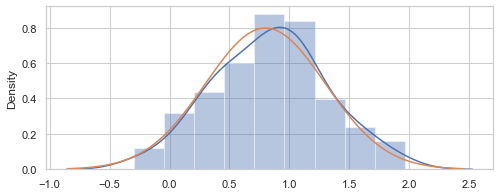

In [90]:
# 귀무가설에 해당하는 분포를 표본 데이터와 함께 표시
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

In [93]:
# 귀무가설: 2개의 확률 변수의 모집단 평균이 동일하다
# 표본이 모집단 평균과 같지 않다를 증명할 수 있는지 봅시다!
n, sigma = 50, 1.0
mu1, mu2 = np.random.rand(2)
X1 = stats.norm(mu1, sigma)
X1_sample = X1.rvs(n)
X2 = stats.norm(mu2, sigma)
X2_sample = X2.rvs(n)

In [94]:
t, p = stats.ttest_ind(X1_sample, X2_sample)
print("t: ", t)
print("p: ", p)
print("mu1, mu2: ", mu1, mu2)

t:  0.15381453095099046
p:  0.8780722757826268
mu1, mu2:  0.3185505591372729 0.18712670450619673


p-value는 약 0.878로 0.05보다 크므로 귀무가설 기각  
모집단 평균이 다르다!

### 비매개변수

In [95]:
# 자유도가 5인 분포를 사용해 시뮬레이션을 해봅시돠!
X = stats.chi2(df=5)
X_samples = X.rvs(100)

In [97]:
# 주어진 데이터에 대핸 KDE값을 계산 KDE(커널 밀도 추정)
kde = stats.kde.gaussian_kde(X_samples)

C:\Users\82109\AppData\Local\Temp\ipykernel_17980\302795619.py:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde = stats.kde.gaussian_kde(X_samples)


In [98]:
# 적절한 대역폭을 계산하기 위한 표준 방법이 default로 사용됨
# 하지만 bw_method 인수를 사용해서 직접 설정해줄수도 있음
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

C:\Users\82109\AppData\Local\Temp\ipykernel_17980\1309193561.py:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)


C:\Users\82109\.conda\envs\summer\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

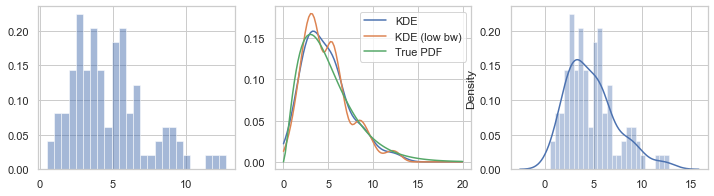

In [100]:
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, density=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

# 너므 어려워요....................ㅠㅠ